**Importing the required packages
Importing and reading the data:**
NSFG (National Survey of Family Growth) data is in form of (HDF5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nsfg = pd.read_hdf("../input/national-survey-of-family-growthnsfg/nsfg.hdf5", "nsfg")
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [2]:
# Data Frames and Series:


# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

# How many pregnancies in this dataset ended with a live birth?
nsfg[nsfg["outcome"] == 1].sort_values

(9358, 10)
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


<bound method DataFrame.sort_values of       caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0      60418        1           5.0           4.0        40       1.0    2000   
1      60418        1           4.0          12.0        36       1.0    2291   
2      60418        1           5.0           4.0        36       1.0    3241   
4      60420        1           8.0          13.0        41       1.0    2191   
6      60423        1           5.0           0.0        35       1.0    2366   
...      ...      ...           ...           ...       ...       ...     ...   
9353   70615        1           4.0          11.0        35       1.0    1758   
9354   70616        1           8.0           7.0        42       1.0    1741   
9355   70616        1           7.0           6.0        36       1.0    2091   
9356   70619        1           8.0           3.0        41       1.0    3450   
9357   70619        1           8.0           5.0        40       1.0 

## Clean a Variable
### In the NSFG dataset, the variable *'nbrnaliv'* records the number of babies born alive at the end of a pregnancy.

### If you use .value_counts() to view the responses, you'll see that the value **8** appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

In [3]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


**Checking the data for errors and correcting them**

In [4]:
# The number 8 in (nbrnaliv) column (number of babies born alive at the end of pregnancy) indicates that the repondent refused to answer
nsfg["nbrnaliv"].value_counts()
# We must replace it, the other values (1, 2, 3) indicate the number of babies

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [5]:
# Replacing 8 with NaN
nsfg["nbrnaliv"].replace(8, np.nan, inplace = True)
nsfg["nbrnaliv"].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [6]:
pounds = nsfg["birthwgt_lb1"]
pounds.value_counts().sort_index()
# The most frequent values are 6-8 pounds, 98.0 and 99.0 indicate missing data

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [7]:
# Then we replace the 98.0 and 99.0 pounds with NaN to represent missing data
pounds = pounds.replace([98, 99], np.nan)

In [8]:
# Tha same thing for ounces
ounces = nsfg["birthwgt_oz1"]
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [9]:
ounces = ounces.replace([98, 99], np.nan)

In [10]:
# Calculating the total birth weight
# 1 pound = 16 ounces
birth_weight = pounds + (ounces / 16)
# Some statistics about the total birth weight
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

**Plotting the frequency of birth weights**

<function matplotlib.pyplot.show(close=None, block=None)>

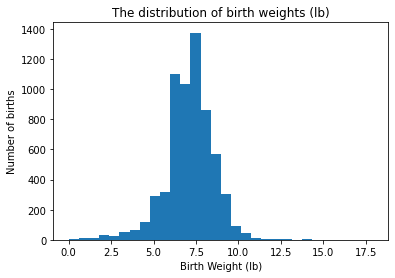

In [11]:
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel("Birth Weight (lb)")
plt.ylabel("Number of births")
plt.title("The distribution of birth weights (lb)")
plt.show

In [12]:
# We can use the column (prglngth) to determine if the baby is preterm (prglngth < 37) or fullterm
preterm = nsfg["prglngth"] < 37 # True if it is preterm
fullterm = ~preterm
# The number of preterm babies
print("The number of preterm babies:", preterm.sum())
print("The number of fullterm babies:", fullterm.sum())

The number of preterm babies: 3742
The number of fullterm babies: 5616


In [13]:
# Showing the weights of preterm babies
preterm_weight = birth_weight[preterm]
# The mean of the weights of preterm babies
print("Mean of the weights of preterm babies:", preterm_weight.mean())

Mean of the weights of preterm babies: 5.577598314606742


In [14]:
# Showing the weights of preterm babies
fullterm_weight = birth_weight[~preterm]
# The mean of the weights of fullterm babies
print("Mean of the weights of fullterm babies:", fullterm_weight.mean())

Mean of the weights of fullterm babies: 7.372323879231473


In [15]:
# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & ~preterm]
print("Single full-term mean:", single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & ~preterm]
print("Multiple full-term mean:", mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
